<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3<br>
<font color=696880 size=4>
    Ashkan Majidi - Shayan Salehi - Amirhossein Alamdar

____

# Personal Data

In [1]:
student_number = '402208592'
first_name = 'Mohammad'
last_name = 'Mohammadi'

# Introduction

In this assignment, you will implement SVM (Support Vector Machines) for classification.


# Data Prepfocessing

Import your needed libraries in following cell.

In [28]:
# TODO: Write your code here
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, make_scorer
from sklearn.svm import SVC
from cvxopt import matrix, solvers
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!unzip /content/Data.zip

Archive:  /content/Data.zip
   creating: Data/
  inflating: __MACOSX/._Data         
  inflating: Data/satimage.csv       


Load data from ```satimage``` dataset and split data to features and labels. The ```label``` column is our target variable.

In [4]:
# TODO: Write your code here

data_path = '/content/Data/satimage.csv'
satimage_data = pd.read_csv(data_path)
# print(satimage_data.head())

# Split the data to features and labels
X = satimage_data.drop(columns=['label'])
y = satimage_data['label']

X.head(), y.head()

(      0         1         2         3         4         5          6       7  \
 0   7.5  6.272730  4.047619  3.975208  3.032258  4.545455   8.421050  1.8125   
 1   7.5  4.090909 -0.714290  1.776858  2.903226  3.090909   5.052630 -1.7500   
 2  12.0  9.909090  8.333330  5.479339  3.354839  7.272730  10.526316  2.7500   
 3   7.5  4.818182  1.190480  2.702482  2.774194  2.363640   5.894740 -0.2500   
 4   7.5  4.818182  2.142860  2.702482  3.032258  3.090909   6.736840 -1.0000   
 
         8         9  ...        26        27        28        29        30  \
 0 -2.2500  0.077672  ... -0.517241 -0.600000 -0.138462 -0.188119 -0.431579   
 1 -2.2500  0.077672  ... -0.517241 -0.600000 -0.015385 -0.049505 -0.431579   
 2  3.4375  6.368924  ...  0.103448 -0.233333  0.200000  0.207921 -0.010526   
 3 -3.8750 -2.368924  ... -0.011494 -0.383333 -0.138462 -0.049505 -0.347368   
 4 -0.6250 -1.320388  ...  0.287356 -0.183333  0.230769  0.267327 -0.031579   
 
          31       32        33     

Now split data to train, validation and test parts. 60% of data should be used for train, 15% for validation and 25% for test. After that scale the data to Standard Normal Distribution using ```StandardScaler``` class from ```scikit-learn``` library.

In [5]:
# TODO: Write your code here
# Splitting the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42)  # 60% for training
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(25/40), random_state=42)  # 15% validation, 25% test

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.mean(axis=0), X_train_scaled.std(axis=0)

(array([ 6.44107634e-17, -8.28138387e-17,  1.82650522e-16, -8.05134543e-18,
        -6.51468864e-16,  7.91332236e-17,  2.81567051e-16,  1.61026909e-18,
        -1.65627677e-17, -5.88898408e-17, -7.36123010e-18, -2.11635365e-17,
         1.33422296e-17, -1.28821527e-17,  5.01483801e-17,  5.56693027e-17,
         1.15019220e-17, -9.20153763e-18, -2.11635365e-17,  1.19619989e-17,
        -5.06084570e-18,  9.01750688e-17,  6.80913785e-17,  5.29088414e-17,
         2.30038441e-18, -9.20153763e-18, -3.12852279e-17, -1.84030753e-17,
        -1.74829215e-17,  9.20153763e-18,  9.89165295e-18, -8.97149919e-18,
         4.37073037e-17,  2.57643054e-17,  1.33422296e-17, -4.39373422e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]))

We want to train Binary SVM model for classification between labels 4 and 6. Choose corresponding datas and convert their lables to 1 and -1 respectively for 4 and 6.

In [6]:
# TODO: Write your code here

filtered_indices_train = (y_train == 4) | (y_train == 6)
X_train_binary = X_train_scaled[filtered_indices_train]
y_train_binary = y_train[filtered_indices_train].map({4: 1, 6: -1})

filtered_indices_val = (y_val == 4) | (y_val == 6)
X_val_binary = X_val_scaled[filtered_indices_val]
y_val_binary = y_val[filtered_indices_val].map({4: 1, 6: -1})

filtered_indices_test = (y_test == 4) | (y_test == 6)
X_test_binary = X_test_scaled[filtered_indices_test]
y_test_binary = y_test[filtered_indices_test].map({4: 1, 6: -1})

y_train_binary.head(), y_val_binary.head(), y_test_binary.head()

(5658    1
 356    -1
 3624   -1
 2807    1
 6343   -1
 Name: label, dtype: int64,
 5620    1
 3248   -1
 5605    1
 4272   -1
 3893   -1
 Name: label, dtype: int64,
 1052    1
 6111   -1
 1532    1
 1661    1
 181    -1
 Name: label, dtype: int64)

# Model (50 points)

Here is soft margin svm convex optimization formulation.
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^N \xi_i \\
\text { Subject to } & y_i\left(\mathbf{w}^T \mathbf{x}_i+b\right) \geq 1-\xi_i, \quad i=1,2, \ldots, N \\
& \xi_i \geq 0, \quad i=1,2, \ldots, N
\end{aligned}
$$
write dual of the soft margin svm optimization problem below:

In order to implement SVM, we need the dual objective function form which can be formulated as below:

$$\text{Maximize} \quad W(\alpha) = \sum_{i=1}^N \alpha_i - \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j$$

Subject to the constraints:

$$0 \leq \alpha_i \leq C, \quad i=1,2,\ldots,N$$

$$\sum_{i=1}^N \alpha_i y_i = 0$$

This form allows us to solve the SVM optimization problem.

Now you should write this optimization problem in standard Quadratic Program (QP) form and use a QP solver to find optimal answer. Here is General form of a QP:
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2} x^TPx + q^Tx + r \\
\text { Subject to } & Gx \leq h \\
& Ax = b
\end{aligned}
$$

Complete functions below and use ```cvxopt``` library which is a common library for solving QPs. Note that you can't use ```scikit-learn``` library.


**To transform to Standard QP Form:**

The QP objective is to minimize, so we multiply the SVM dual by −1 to convert it from a maximization to a minimization problem:

$$\text{Minimize} \quad \frac{1}{2} \alpha^T P \alpha - q^T \alpha$$

where $P_{ij} = y_iy_j X_i^T X_j$ and $q_i = -1$ for all i.

The inequality constraints $Gx≤h$ correspond to:

$$-\alpha_i \leq 0 \quad \text{and} \quad \alpha_i \leq C$$

We can represent these constraints in matrix form as:

$$G = \begin{bmatrix} -I \\ I \end{bmatrix}, \quad h = \begin{bmatrix} 0 \\ C \end{bmatrix}$$

where $I$ is the $N×N$ identity matrix.

The equality constraint $Ax=b$ captures:

$$A = \begin{bmatrix} y_1 & y_2 & \dots & y_N \end{bmatrix}, \quad b = 0$$

In [7]:
def soft_margin_svm(X, y, C):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    """

    # TODO: Write your code here


    n_samples, n_features = X.shape
    y = np.array(y).reshape(-1, 1) * 1.0
    P = matrix(np.dot(y * X, (y * X).T))
    q = matrix(-np.ones((n_samples, 1)))
    G = matrix(np.vstack((np.eye(n_samples) * -1, np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    A = matrix(y.reshape(1, -1))
    b = matrix(0.0)

    solvers.options['show_progress'] = True
    solution = solvers.qp(P, q, G, h, A, b)

    alphas = np.array(solution['x']).flatten()

    support_indices = (alphas > 1e-5)
    support_vectors = X[support_indices]
    support_vector_labels = y[support_indices]
    support_vector_alphas = alphas[support_indices]

    return support_vectors, support_vector_labels.flatten(), support_vector_alphas

In [8]:
C = 1.0
support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X_train_binary, y_train_binary, C)

     pcost       dcost       gap    pres   dres
 0: -6.1265e+02 -3.3971e+03  2e+04  3e+00  2e-13
 1: -4.1824e+02 -2.2816e+03  3e+03  3e-01  2e-13
 2: -3.9732e+02 -7.6474e+02  4e+02  3e-02  1e-13
 3: -4.4111e+02 -5.8227e+02  2e+02  9e-03  1e-13
 4: -4.6125e+02 -5.3708e+02  8e+01  4e-03  1e-13
 5: -4.7293e+02 -5.1305e+02  4e+01  2e-03  1e-13
 6: -4.7763e+02 -5.0407e+02  3e+01  1e-03  1e-13
 7: -4.8272e+02 -4.9477e+02  1e+01  4e-04  1e-13
 8: -4.8534e+02 -4.9054e+02  5e+00  2e-04  1e-13
 9: -4.8671e+02 -4.8840e+02  2e+00  4e-05  1e-13
10: -4.8718e+02 -4.8773e+02  6e-01  7e-06  1e-13
11: -4.8738e+02 -4.8747e+02  9e-02  4e-07  1e-13
12: -4.8742e+02 -4.8743e+02  7e-03  3e-08  1e-13
13: -4.8742e+02 -4.8742e+02  2e-04  6e-10  2e-13
Optimal solution found.


In [9]:
def predict_labels(x_test, support_vectors, support_vector_labels, support_vector_alphas):
    """
    input:
        x_test: test data
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    output:
        y_pred: predictoin labels
    """

    # TODO: Write your code here


    kernel = np.dot(x_test, support_vectors.T)

    decision = np.dot(kernel, support_vector_alphas * support_vector_labels)

    support_kernel = np.dot(support_vectors, support_vectors.T)
    weighted_sum = np.dot(support_vector_alphas * support_vector_labels, support_kernel)

    biases = support_vector_labels.flatten() - weighted_sum
    b = np.mean(biases)

    decision += b

    y_pred = np.sign(decision)

    return y_pred


In [10]:
y_pred = predict_labels(np.array(X_test_binary), support_vectors, support_vector_labels, support_vector_alphas)

# Evaluation (20 points)

Compute accuracy, balanced accuracy and plot confusion matrix of your trained model using ```Seaborn.heatmap()``` function. Use case of balanced accuracy is when dealing with imbalanced data, i.e. when one of the target classes appears a lot more than the other and it is defined by average of recall of classes. Confusion matrix is a $k\times k$ (k is number of classes) matrix which cell ij is showing that number of data points labeld i which predicted j. For more detail of evaluation metrics you can see [here](https://neptune.ai/blog/balanced-accuracy).

You may use ```scikit-learn``` library to compute these metrics.

In [11]:
def evaluate(y_test, y_pred):
    """
    input:
        y_test: true labels
        y_pred: predicted labels
    output:
        accuracy: accuracy of the model
        balanced_accuracy: balanced accuracy of the model
        confusion_matrix: confusion matrix of the model
    """
    # TODO: Write your code here

    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("Accuracy: ", accuracy)
    print("Balanced Accuracy: ", balanced_accuracy)
    print("Confusion Matrix:\n", confusion_mat)
    return accuracy, balanced_accuracy, confusion_mat

_, _, confusion_mat = evaluate(y_test_binary, y_pred)


Accuracy:  0.845724907063197
Balanced Accuracy:  0.822513265392066
Confusion Matrix:
 [[336  47]
 [ 36 119]]


<Axes: >

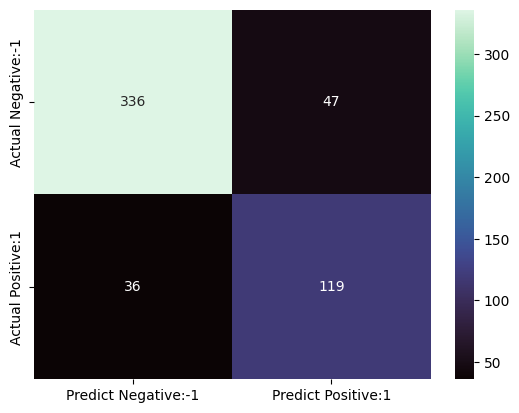

In [12]:
cm_matrix = pd.DataFrame(data=confusion_mat, columns=['Predict Negative:-1', 'Predict Positive:1'],
                                 index=['Actual Negative:-1', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

# Fine-tunning (40 points)

like what you did before, implement Soft Margin SVM but now use rbf kernel. To determine rbf $\gamma$ parameter use validation datas and find best(best by balanced accuracy) $\gamma$ between 0.001 , 0.01, 1, 10, 100. Not that you can't use ```scikit-learn``` library here.

In [26]:
def rbf(x1, x2, gamma=1):
    """
    input:
        x1: first vector
        x2: second vector
        gamma: rbf kernel parameter with defalt value 1.
    output:
        ouput: computed rbf of two input vectors
    """
    # TODO: Write your code here

    distance_squared = np.sum((x1 - x2)**2)
    output = np.exp(-gamma * distance_squared)
    return output

def soft_margin_svm(X, y, C, gamma=1):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
        gamma: rbf kernel parameter with defalt value 1.
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs
    """

    # TODO: Write your code here

    n_samples, n_features = X.shape
    K = np.zeros((n_samples, n_samples))

    # Filling the kernel matrix
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = rbf(X[i], X[j], gamma)

    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(n_samples))
    G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    A = matrix(y, (1, n_samples), 'd')
    b = matrix(0.0)

    # QP problem
    print("Gamma: ", gamma)
    solvers.options['show_progress'] = True
    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(solution['x']).flatten()

    support_indices = (alphas > 1e-5)
    support_vectors = X[support_indices]
    support_vector_labels = y[support_indices]
    support_vector_alphas = alphas[support_indices]

    return support_vectors, support_vector_labels, support_vector_alphas

In [18]:
def predict_with_svm(X, support_vectors, support_vector_labels, support_vector_alphas, gamma):
    """
    For making predictions using the trained SVM model with RBF kernel
    """
    y_pred = np.zeros(len(X))
    for i in range(len(X)):
        sum_alpha_y_kernel = 0
        for alpha, y, sv in zip(support_vector_alphas, support_vector_labels, support_vectors):
            sum_alpha_y_kernel += alpha * y * rbf(X[i], sv, gamma)
        y_pred[i] = np.sign(sum_alpha_y_kernel)
    return y_pred

In [27]:
gammas = [00.1, 0.1, 1, 10, 100]
best_gamma = None
best_support_vectors = None
best_support_vector_labels = None
best_support_vector_alphas = None

# TODO: Write your code here

best_balanced_accuracy = 0

for gamma in gammas:
    support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X_train_binary, y_train_binary, C=1, gamma=gamma)
    # Predictions using the trained model (left as an exercise)
    y_val_pred = predict_with_svm(X_val_binary, support_vectors, support_vector_labels, support_vector_alphas, gamma)
    bal_acc = balanced_accuracy_score(y_val_binary, y_val_pred)
    if bal_acc > best_balanced_accuracy:
        best_balanced_accuracy = bal_acc
        best_gamma = gamma
        best_support_vectors = support_vectors
        best_support_vector_labels = support_vector_labels
        best_support_vector_alphas = support_vector_alphas


print("Best Gamma:", best_gamma)

Gamma:  0.1
     pcost       dcost       gap    pres   dres
 0: -3.5478e+02 -2.9645e+03  1e+04  3e+00  6e-15
 1: -2.5774e+02 -1.8143e+03  2e+03  1e-01  5e-15
 2: -2.7515e+02 -5.5668e+02  3e+02  2e-02  4e-15
 3: -3.1035e+02 -4.0746e+02  1e+02  5e-03  5e-15
 4: -3.2161e+02 -3.7676e+02  6e+01  2e-03  4e-15
 5: -3.3186e+02 -3.4879e+02  2e+01  3e-04  5e-15
 6: -3.3455e+02 -3.4305e+02  9e+00  1e-04  5e-15
 7: -3.3586e+02 -3.4016e+02  4e+00  7e-15  6e-15
 8: -3.3717e+02 -3.3810e+02  9e-01  1e-14  6e-15
 9: -3.3735e+02 -3.3781e+02  5e-01  8e-16  6e-15
10: -3.3755e+02 -3.3756e+02  2e-02  8e-15  6e-15
11: -3.3755e+02 -3.3755e+02  5e-04  4e-16  6e-15
12: -3.3755e+02 -3.3755e+02  8e-06  1e-14  6e-15
Optimal solution found.
Gamma:  0.1
     pcost       dcost       gap    pres   dres
 0: -3.5478e+02 -2.9645e+03  1e+04  3e+00  6e-15
 1: -2.5774e+02 -1.8143e+03  2e+03  1e-01  5e-15
 2: -2.7515e+02 -5.5668e+02  3e+02  2e-02  4e-15
 3: -3.1035e+02 -4.0746e+02  1e+02  5e-03  5e-15
 4: -3.2161e+02 -3.7676

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [25]:
y_pred = predict_with_svm(np.array(X_test_binary), best_support_vectors, best_support_vector_labels, best_support_vector_alphas, best_gamma)
_, _, confusion_mat = evaluate(y_test_binary, y_pred)

Accuracy:  0.8736059479553904
Balanced Accuracy:  0.8824223027036132
Confusion Matrix:
 [[330  53]
 [ 15 140]]


# Multiclass SVM (30 points + 50 points optional)

Now we want implement Multiclass SVM. Use ```SVC``` function with rbf kernel from ```scikit-learn``` package on all train datas (all six classes) and choose best hyperparameters for $C$ and $\gamma$ between 0.01, 0.1, 1, 10, 100. After that evaluate it with your function.

Note that in this example we had enough data to split them in train and validation but in case that we don't have enough data, ```scikit-learn``` has a built-in fast library named ```GridSearchCV()``` which can help us in hyperparameter tunning with cross validation.

Best parameters:  {'C': 10, 'gamma': 0.1}
Accuracy:  0.9092604101926662
Balanced Accuracy:  0.8880046622293033
Confusion Matrix:
 [[352   0   1   0   2   0]
 [  0 183   1   0   3   2]
 [  3   0 322  12   0   5]
 [  3   4  31  94   3  20]
 [  1   1   1   1 173   8]
 [  0   0   8  31   5 339]]


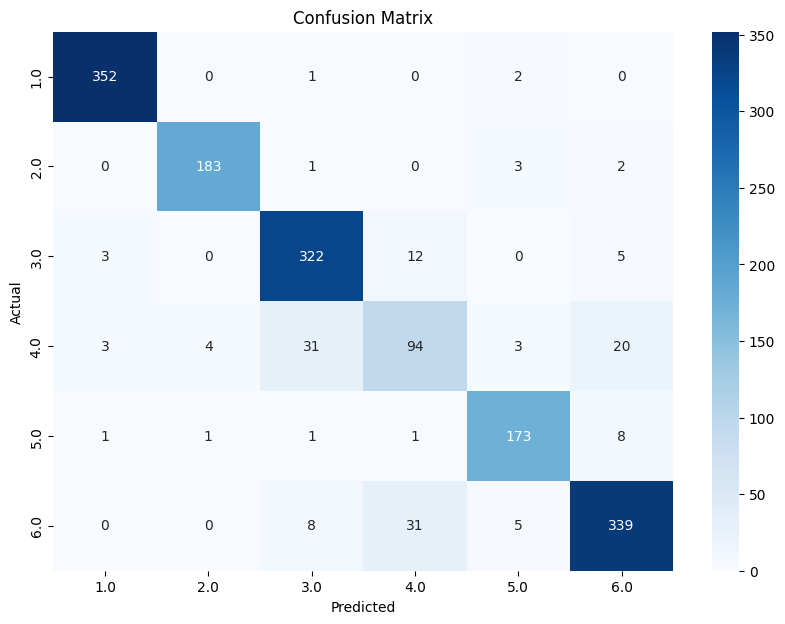

(0.9092604101926662,
 0.8880046622293033,
 array([[352,   0,   1,   0,   2,   0],
        [  0, 183,   1,   0,   3,   2],
        [  3,   0, 322,  12,   0,   5],
        [  3,   4,  31,  94,   3,  20],
        [  1,   1,   1,   1, 173,   8],
        [  0,   0,   8,  31,   5, 339]]))

In [48]:
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1, 10, 100]
# TODO: Write your code here

svc = SVC(kernel='rbf')

# TO feed GridSearchCV w/ appropriate format of parameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(svc, param_grid, scoring='balanced_accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train)
best_svc = grid_search.best_estimator_

print("Best parameters: ", grid_search.best_params_)

y_pred = best_svc.predict(X_test_scaled)

def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("Accuracy: ", accuracy)
    print("Balanced Accuracy: ", balanced_accuracy)
    print("Confusion Matrix:\n", confusion_mat)

    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy, balanced_accuracy, confusion_mat

evaluate(y_test, y_pred)

Implement Multiclass SVM from scratch without using ready functions (optional).

In [50]:
# TODO: Write your code here

def rbf_kernel(x1, x2, gamma):
    x1 = np.atleast_2d(x1)
    return np.exp(-gamma * np.sum((x1 - x2) ** 2, axis=1))

def train_svm(X, y, C, gamma):
    n_samples, n_features = X.shape
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = rbf_kernel(X[i], X[j], gamma)

    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(n_samples))
    G = matrix(np.vstack((np.eye(n_samples) * -1, np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    A = matrix(y, (1, n_samples), 'd')
    b = matrix(0.0)
    # Only using cvxopt library for solving the SVM's QP problem
    solvers.options['show_progress'] = True
    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.ravel(solution['x'])
    return alphas

def fit_multiclass_svm(X, y, C, gamma, classes):
    models = {}
    for cl in classes:
        tmp_y = np.where(y == cl, 1, -1)
        alphas = train_svm(X, tmp_y, C, gamma)
        models[cl] = alphas
    return models

def predict_multiclass(X, models, X_train, y_train, gamma):
    n_samples = X.shape[0]
    n_classes = len(models)
    predictions = np.zeros((n_samples, n_classes))

    for idx, (cl, alphas) in enumerate(models.items()):
        is_support = (alphas > 1e-5)
        support_vectors = X_train[is_support]
        support_labels = y_train[is_support]
        support_alphas = alphas[is_support]
        for j in range(n_samples):
            kernel_values = rbf_kernel(X[j], support_vectors, gamma)
            decision_value = np.sum(support_alphas * support_labels * kernel_values)
            predictions[j, idx] = decision_value

    y_pred = np.argmax(predictions, axis=1)
    class_labels = list(models.keys())
    y_pred = np.array([class_labels[idx] for idx in y_pred])
    return y_pred



classes = np.unique(y_train)
models = fit_multiclass_svm(X_train_scaled, y_train, C=1, gamma=0.1, classes=classes)
y_pred = predict_multiclass(X_test_scaled, models, X_train_scaled, y_train, best_gamma)

<ipython-input-50-c50b719e30e4>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K[i, j] = rbf_kernel(X[i], X[j], gamma)


     pcost       dcost       gap    pres   dres
 0: -1.3328e+02 -7.7517e+03  4e+04  3e+00  2e-15
 1: -8.0322e+01 -3.9813e+03  6e+03  2e-01  2e-15
 2: -7.0835e+01 -6.4281e+02  7e+02  2e-02  3e-15
 3: -9.6460e+01 -2.9483e+02  2e+02  5e-03  2e-15
 4: -1.0933e+02 -1.9893e+02  9e+01  1e-03  2e-15
 5: -1.1828e+02 -1.5893e+02  4e+01  3e-04  2e-15
 6: -1.2209e+02 -1.4484e+02  2e+01  8e-05  2e-15
 7: -1.2519e+02 -1.3582e+02  1e+01  3e-06  2e-15
 8: -1.2726e+02 -1.3099e+02  4e+00  4e-07  2e-15
 9: -1.2811e+02 -1.2940e+02  1e+00  1e-07  2e-15
10: -1.2843e+02 -1.2883e+02  4e-01  3e-09  2e-15
11: -1.2855e+02 -1.2867e+02  1e-01  2e-15  2e-15
12: -1.2859e+02 -1.2862e+02  3e-02  3e-15  2e-15
13: -1.2860e+02 -1.2861e+02  1e-03  3e-15  2e-15
14: -1.2860e+02 -1.2860e+02  4e-05  2e-15  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.2857e+01 -6.1352e+03  3e+04  2e+00  1e-15
 1: -3.4877e+01 -2.6834e+03  4e+03  1e-01  2e-15
 2: -3.7846e+01 -4.4235e+02  5e+02  1e-02  2e-1

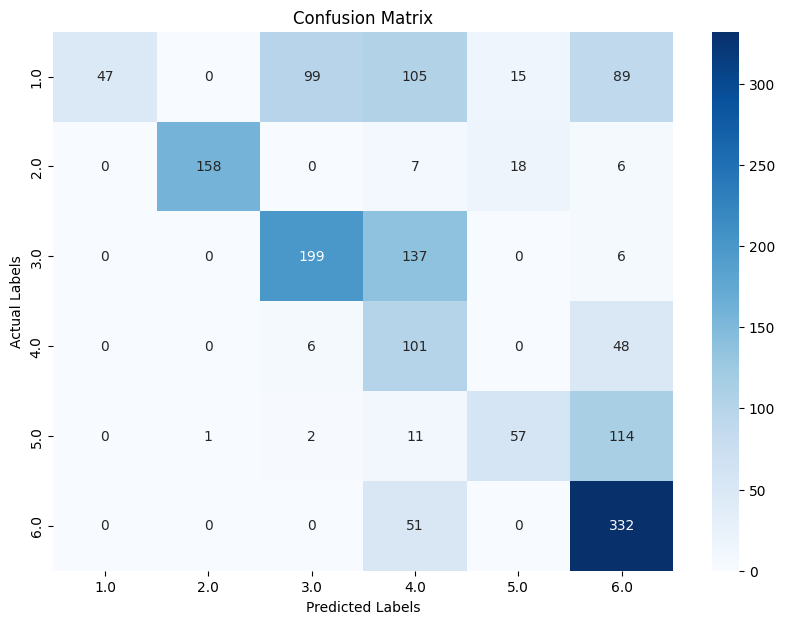

Accuracy: 0.5556246115599751


In [51]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()
    return cm

accuracy = calculate_accuracy(y_test, y_pred)
conf_matrix = plot_confusion_matrix(y_test, y_pred, classes=np.unique(y_test))
print("Accuracy:", accuracy)

# Different SVM Kernels (40 points)

A kernel in SVM is like a tool that helps solve tricky problems. It lets us work in a space with many dimensions, making complex calculations easier. With kernels, we can deal with lots of dimensions, even an endless amount. Kernels are crucial for sorting data into groups and help spot patterns in the data we're looking at. They're especially good at tackling twisty problems with a straightforward approach.

Sometimes, finding a straight line or flat surface to divide data isn't possible, especially as we explore more dimensions. That's where different types of SVM kernels come in handy. They transform twisty, complicated data into a simpler form that's easier to separate. In this explanation, we talk about 4 popular types of these kernels. Also in following cells you can use any package.

<img src="./kernel.jpg" alt="Types of Kernel Functions"  align=center class="saturate">

### Linear Kernel

This is the simplest kind of kernel, typically working in one dimension. It works best when dealing with a lot of features. Linear kernels are quicker than other types.

**Formula:**

$$F(x, x_j) = sum(x, x_j)$$

Now Implement svc classifier using a linear kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix by `Seaborn`.

Accuracy:  0.872591671845867
Balanced Accuracy:  0.8344319384555986
Confusion Matrix:
 [[351   0   1   0   3   0]
 [  1 173   1   0  14   0]
 [  3   0 322  15   1   1]
 [  4   1  37  72   3  38]
 [  5   7   0   2 153  18]
 [  0   0  11  27  12 333]]


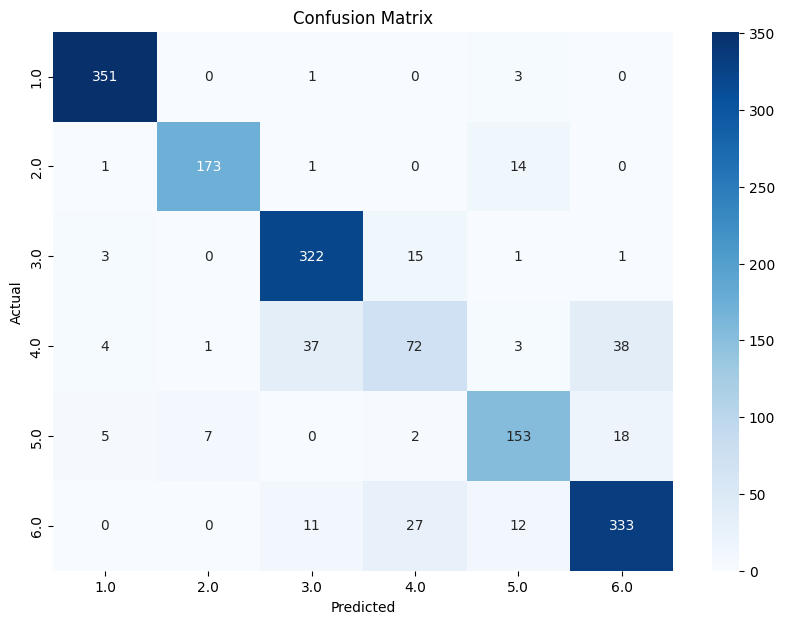

(0.872591671845867,
 0.8344319384555986,
 array([[351,   0,   1,   0,   3,   0],
        [  1, 173,   1,   0,  14,   0],
        [  3,   0, 322,  15,   1,   1],
        [  4,   1,  37,  72,   3,  38],
        [  5,   7,   0,   2, 153,  18],
        [  0,   0,  11,  27,  12, 333]]))

In [53]:
# TODO: Write your code here
svc = SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("Accuracy: ", accuracy)
    print("Balanced Accuracy: ", balanced_accuracy)
    print("Confusion Matrix:\n", confusion_mat)

    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    return accuracy, balanced_accuracy, confusion_mat


evaluate(y_test, y_pred)

### Gaussian RBF kernel

This kernel is a favorite choice in SVM, especially for data that doesn't line up straight. It's great for sorting data when you don't know much about it beforehand.

**Formula:**

$$F(x, x_j) = \exp{(-\gamma ||x - xj||^2)}$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous part.

Accuracy:  0.8912367930391547
Balanced Accuracy:  0.8678617390048845
Confusion Matrix:
 [[351   1   2   0   1   0]
 [  0 181   0   1   6   1]
 [  3   1 325   7   1   5]
 [  3   1  37  90   2  22]
 [  3   2   1   1 164  14]
 [  0   1  11  41   7 323]]


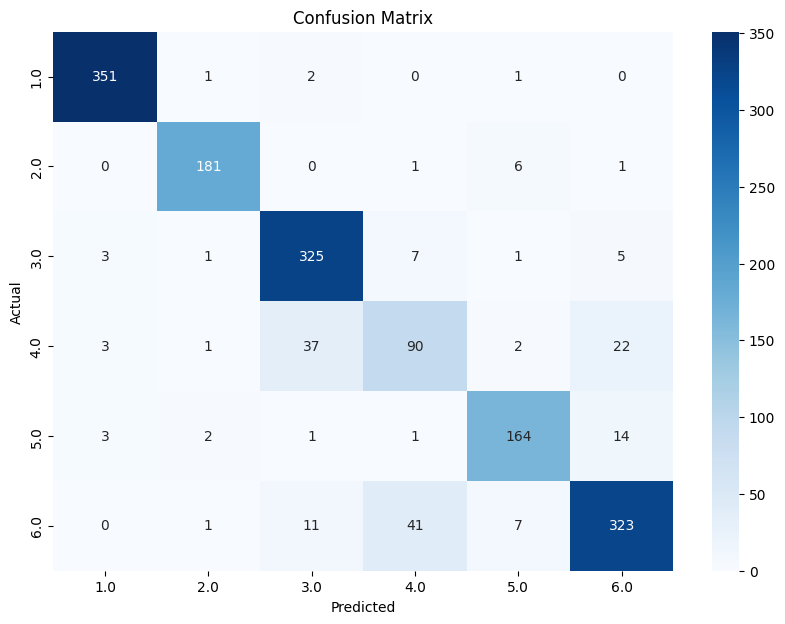

(0.8912367930391547,
 0.8678617390048845,
 array([[351,   1,   2,   0,   1,   0],
        [  0, 181,   0,   1,   6,   1],
        [  3,   1, 325,   7,   1,   5],
        [  3,   1,  37,  90,   2,  22],
        [  3,   2,   1,   1, 164,  14],
        [  0,   1,  11,  41,   7, 323]]))

In [55]:
# TODO: Write your code here
svc_rbf = SVC(kernel='rbf', gamma='scale')
svc_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svc_rbf.predict(X_test_scaled)

evaluate(y_test, y_pred_rbf)

### Polynomial Kernel

This is a broader version of the linear kernel. It's not as popular because it's not as quick or precise.

**Formula:**

$$F(x, x_j) = (x.x_j+1)^d$$

Now, set up the SVC classifier using a *polynomial* kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

Accuracy:  0.8949658172778123
Balanced Accuracy:  0.8710301313697375
Confusion Matrix:
 [[352   0   1   0   2   0]
 [  0 181   1   0   5   2]
 [  3   1 325   7   1   5]
 [  3   1  35  93   2  21]
 [  4   2   0   1 161  17]
 [  0   1  11  35   8 328]]


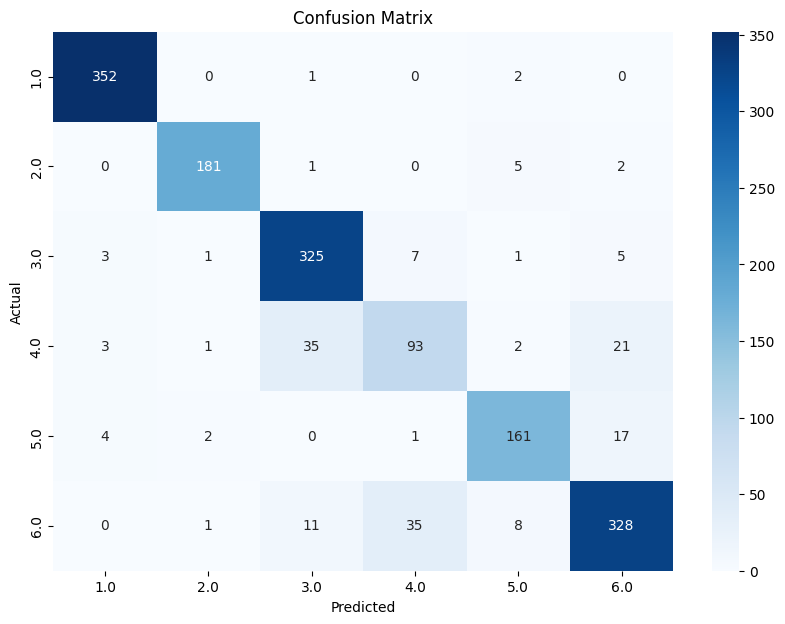

(0.8949658172778123,
 0.8710301313697375,
 array([[352,   0,   1,   0,   2,   0],
        [  0, 181,   1,   0,   5,   2],
        [  3,   1, 325,   7,   1,   5],
        [  3,   1,  35,  93,   2,  21],
        [  4,   2,   0,   1, 161,  17],
        [  0,   1,  11,  35,   8, 328]]))

In [56]:
# TODO: Write your code here
svc_poly = SVC(kernel='poly', degree=3, coef0=1)
svc_poly.fit(X_train_scaled, y_train)
y_pred_poly = svc_poly.predict(X_test_scaled)

evaluate(y_test, y_pred_poly)

### Sigmoid Kernel

This is mainly chosen for use with neural networks. The kernel function acts like the activation function in a two-layer perceptron neural network model, helping to activate the neurons.

**Formula:**

$$F(x, x_j) = \tanh(α x a y + c)$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

Accuracy:  0.6681168427594779
Balanced Accuracy:  0.5901725533647915
Confusion Matrix:
 [[281  19  15   0  40   0]
 [ 82 101   0   1   5   0]
 [  9   0 312  18   1   2]
 [  5   0  52  30  19  49]
 [  7  56   5  39  69   9]
 [  0   0  17  44  40 282]]


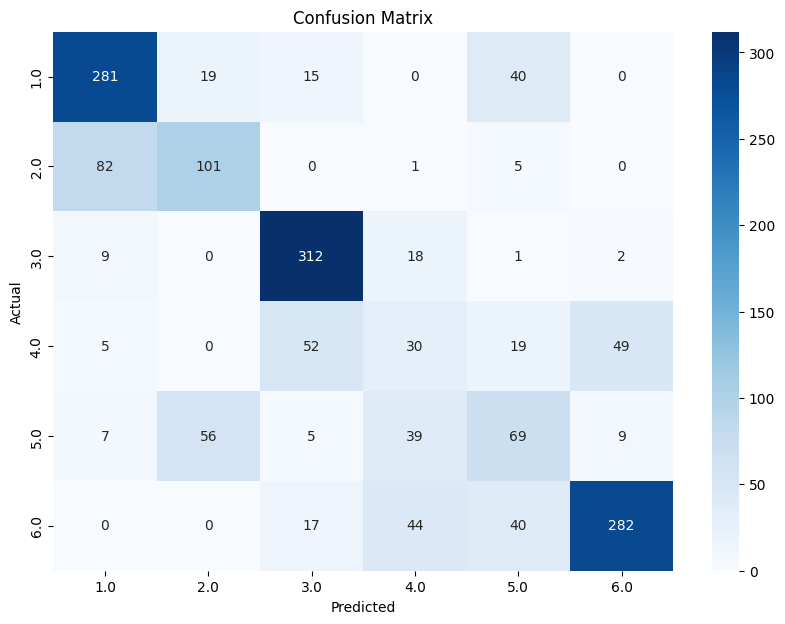

(0.6681168427594779,
 0.5901725533647915,
 array([[281,  19,  15,   0,  40,   0],
        [ 82, 101,   0,   1,   5,   0],
        [  9,   0, 312,  18,   1,   2],
        [  5,   0,  52,  30,  19,  49],
        [  7,  56,   5,  39,  69,   9],
        [  0,   0,  17,  44,  40, 282]]))

In [58]:
# TODO: Write your code here
svc_sigmoid = SVC(kernel='sigmoid', gamma='auto', coef0=1)
svc_sigmoid.fit(X_train_scaled, y_train)
y_pred_sigmoid = svc_sigmoid.predict(X_test_scaled)

evaluate(y_test, y_pred_sigmoid)

Compare these four kernel functions with each other. What are the main advantages and disadvantages of each one?

*   Linear kernels are best when the data is inherently linear or when computational efficiency is crucial.
*   Polynomial kernels are suitable for datasets where feature interactions play a crucial role, and the data is polynomially separable.
*   RBF kernels are ideal for complex datasets with intricate structures, assuming computational resources are sufficient.
*   Sigmoid kernels offer a neural network-like decision surface but can be tricky to tune and train effectively.